In [83]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
from math import isnan
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

The Steps are broadly:
1) Read and Understand the Data
2) Clean The data
3) Prepare the data for modelling
4) Modelling
5) Analysis and Business Recommendations

## 1) Read and Understand the Data 

In [84]:
# Read The Dataset
retail_df = pd.read_csv("Online+Retail.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [85]:
retail_df.shape

(541909, 8)

In [86]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 2) Clean the Data

In [87]:
# missing values in each column by percentage
round(retail_df.isnull().sum()/len(retail_df) * 100, 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [88]:
# We cannot drop Customer ID as we cannot do Customer Segmentation
# Drop all rows having missing values
retail_df.dropna(inplace=True)

In [89]:
round(retail_df.isnull().sum()/len(retail_df) * 100, 2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [90]:
retail_df.shape

(406829, 8)

## 3) Prepare the Data for Modelling

The Recency Frequency Monetary(RFM) Analysis
1) Recency: Number of Days Since last purchase
2) Frequency: Number of Transactions
3) Monetary: Total amount of Transactions or Total Revenue Contributed by the customer

Hence we need three columns: Recency, Frequency, Monetary

In [91]:
retail_df["Monetary"] = retail_df["Quantity"] * retail_df["UnitPrice"]

In [92]:
retail_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
322015,565219,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,01-09-2011 18:07,0.83,14420.0,United Kingdom,13.28
156266,550130,17003,BROCADE RING PURSE,36,14-04-2011 13:17,0.29,14390.0,United Kingdom,10.44
365180,568699,POST,POSTAGE,1,28-09-2011 14:58,40.00,12352.0,Norway,40.00
175094,551880,21621,VINTAGE UNION JACK BUNTING,2,05-05-2011 09:05,8.50,17374.0,United Kingdom,17.00
141019,548496,22937,BAKING MOULD CHOCOLATE CUPCAKES,36,31-03-2011 13:40,2.55,12678.0,France,91.80
357261,568070,23088,ZINC HEART FLOWER T-LIGHT HOLDER,16,23-09-2011 14:17,1.25,16128.0,United Kingdom,20.00
504259,578945,22469,HEART OF WICKER SMALL,1,27-11-2011 13:47,1.65,16877.0,United Kingdom,1.65
326368,565519,23316,RED REFECTORY CLOCK,2,05-09-2011 11:52,9.95,12502.0,Spain,19.90
407282,571851,23187,FRENCH STYLE STORAGE JAR BONBONS,48,19-10-2011 13:02,0.29,12596.0,Spain,13.92
137391,548158,22115,METAL SIGN EMPIRE TEA,1,29-03-2011 13:28,2.95,15906.0,United Kingdom,2.95


In [93]:
retail_df.rename({"Monetary": "Amount"}, axis=1, inplace=True)

In [94]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [95]:
grouped_df = retail_df.groupby(by="CustomerID", as_index=False).aggregate({"Amount": pd.Series.sum})
grouped_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [96]:
# For making a new column for frequency we need to count the number of invoices
Frequency = retail_df.groupby(by="CustomerID", as_index=False).aggregate({"InvoiceNo": pd.Series.count})
Frequency.columns = ["CustomerID", "Frequency"]

In [97]:
Frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [98]:
grouped_df = pd.merge(grouped_df, Frequency, how="inner", on="CustomerID")
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [99]:
# recency 
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [100]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [101]:
# using to_datetime 
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [102]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [103]:
# compute the max date
max_date = retail_df["InvoiceDate"].max()

In [104]:
max_date

Timestamp('2011-12-09 12:50:00')

In [105]:
# computing the difference between each transaction and this date
retail_df["diff"] = max_date - retail_df["InvoiceDate"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [106]:
# Creating the Recency column
last_purchase = retail_df.groupby(by="CustomerID", as_index=False).aggregate({"diff": pd.Series.min})
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [107]:
# Merging
grouped_df = pd.merge(grouped_df, last_purchase, on="CustomerID", how="inner")
grouped_df.columns = ["CustomerID", "Amount", "Frequency", "Recency"]
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [108]:
# number of days only
grouped_df["Recency"] = grouped_df["Recency"].dt.days
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### Outlier Treatment

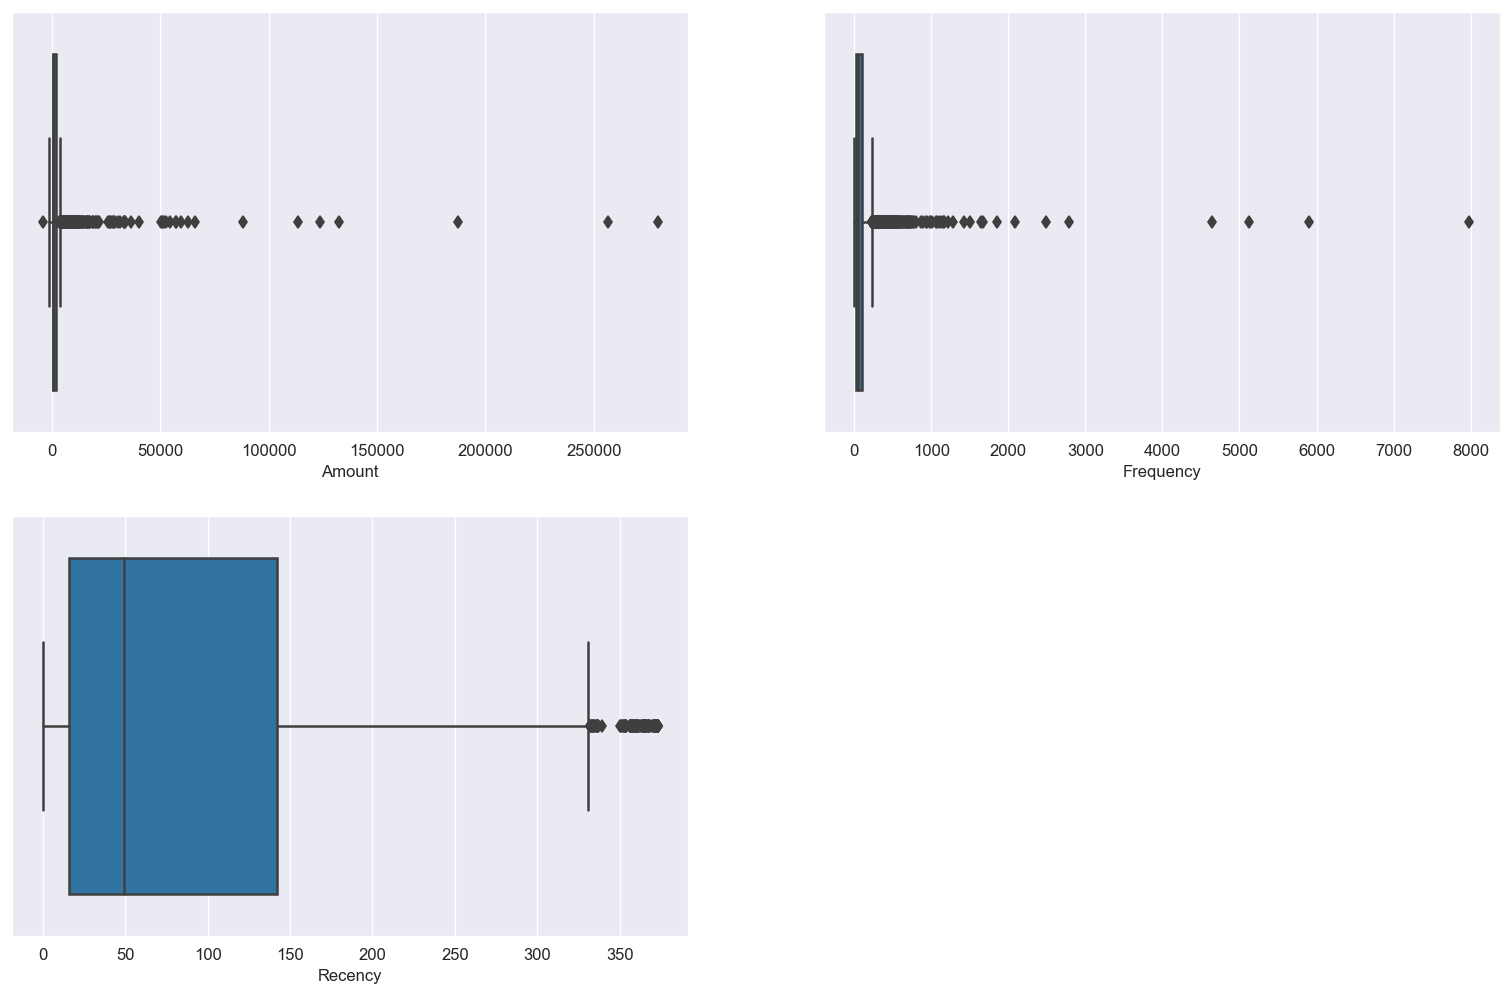

In [109]:
plt.figure(figsize=(16, 10), dpi=120)
plt.subplot(2, 2, 1)
sns.boxplot(data=grouped_df, x="Amount")

plt.subplot(2, 2, 2)
sns.boxplot(data=grouped_df, x="Frequency")

plt.subplot(2, 2, 3)
sns.boxplot(data=grouped_df, x="Recency")

plt.show()

In [110]:
# Removing Statistical outliers
# Treatment for Amount
Q1 = grouped_df.Amount.quantile(0.05)
Q3 = grouped_df.Amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Amount >= Q1 - 1.5 * IQR) & (grouped_df.Amount <= Q3 + 1.5 * IQR)]

# Treatment for Frequency
Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Frequency >= Q1 - 1.5 * IQR) & (grouped_df.Frequency <= Q3 + 1.5 * IQR)]

# Treatment for Recency
Q1 = grouped_df.Recency.quantile(0.05)
Q3 = grouped_df.Recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Recency >= Q1 - 1.5 * IQR) & (grouped_df.Recency <= Q3 + 1.5 * IQR)]

#### Rescaling
Converting the tree variables into the same scale

In [111]:
rfm_df = grouped_df[["Amount", "Frequency", "Recency"]]
rfm_df.head()

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [112]:
# Instantiate the scaler
scaler = StandardScaler()

# fit
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

## Calculating Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [113]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.head()

,0,1,2
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [114]:
def hopkins(x):
    d = x.shape[1]
    #d = len(vars) # columns
    n = len(x) # rows
    m = int(0.1 * n) 
    neighbors = NearestNeighbors(n_neighbors=1).fit(x.values)
 
    rand_x = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = neighbors.kneighbors(np.random.uniform(np.amin(x,axis=0),np.amax(x,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = neighbors.kneighbors(x.iloc[rand_x[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    h = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(h):
        print(ujd, wjd)
        h = 0
 
    return h

In [115]:
value = hopkins(rfm_df_scaled)
value

0.9565435937177251

##### Means that our dataframe is Clusterable

# 4) Modelling

In [116]:
rfm_df_scaled.columns = ["Amount", "Frequency", "Recency"]
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [117]:
# Kmeans with some arbitrary K
Kmeans = KMeans(n_clusters=4, max_iter=50)
Kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [118]:
print(Kmeans.labels_)

[3 2 1 ... 3 1 1]


#### By Elbow Curve technique to finding the optimal number of clusters which is also called Sum of Squared Distances(SSD)

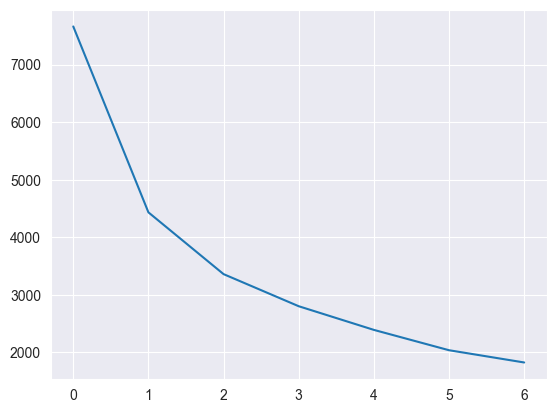

In [119]:
ssd = []
range_of_clusters = [2, 3, 4, 5, 6, 7, 8] 
for number_of_clusters in range_of_clusters:
    Kmeans = KMeans(n_clusters=number_of_clusters, max_iter=50)
    Kmeans.fit(rfm_df_scaled)
    
    ssd.append(Kmeans.inertia_)
    
# Plot the sum of squared distances for each n_clusters
plt.plot(ssd)
plt.show()

#### Finding the optimal number of clusters using the silhoutte Analysis

In [120]:
for number_of_clusters in range_of_clusters:
    # initialize kmeans
    Kmeans = KMeans(n_clusters=number_of_clusters, max_iter=50)
    Kmeans.fit(rfm_df_scaled)
    
    cluster_labels = Kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print(f"for n_clusters = {number_of_clusters}, the silhouette_score is {silhouette_avg}")

for n_clusters = 2, the silhouette_score is 0.5415858652525395
for n_clusters = 3, the silhouette_score is 0.5084896296141937
for n_clusters = 4, the silhouette_score is 0.48104681487838963
for n_clusters = 5, the silhouette_score is 0.46627005641897035
for n_clusters = 6, the silhouette_score is 0.4169515238218781
for n_clusters = 7, the silhouette_score is 0.4148000729503976
for n_clusters = 8, the silhouette_score is 0.39256350815867763


Let's go ahead with 3 clusters

In [121]:
Kmeans = KMeans(n_clusters=3, max_iter=50)
Kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [122]:
Kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [123]:
grouped_df["Cluster_id"] = Kmeans.labels_

In [124]:
grouped_df

,CustomerID,Amount,Frequency,Recency,Cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,1
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,1


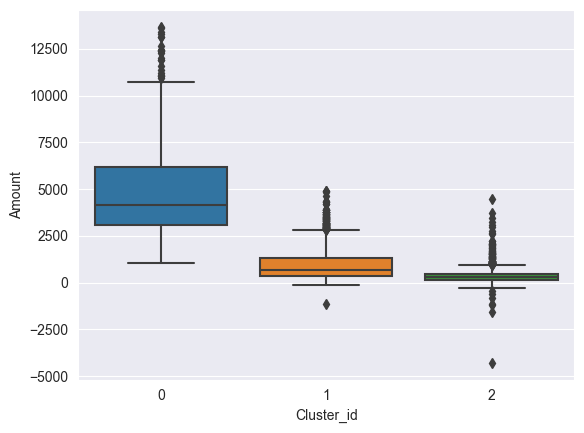

In [125]:
sns.boxplot(data=grouped_df, x="Cluster_id", y="Amount")
plt.show()

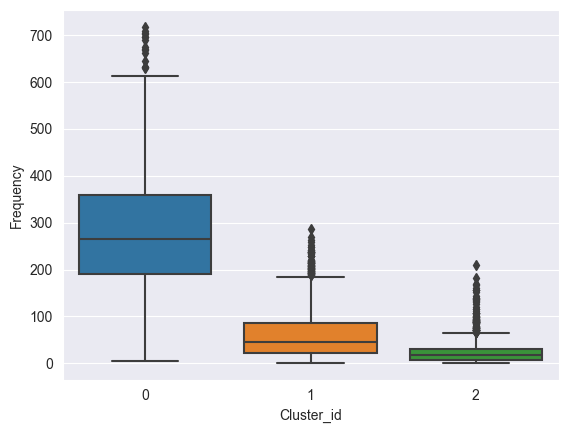

In [126]:
sns.boxplot(data=grouped_df, x="Cluster_id", y="Frequency")
plt.show()

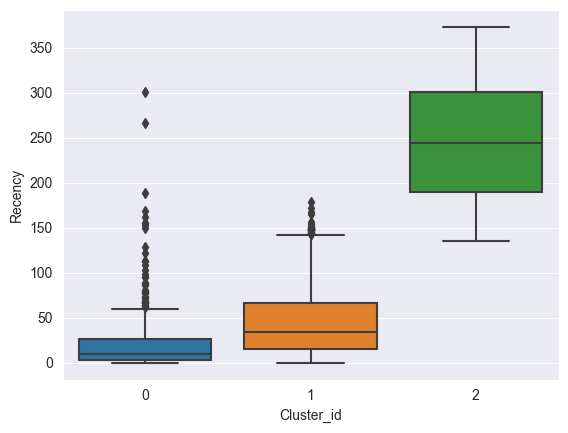

In [127]:
sns.boxplot(data=grouped_df, x="Cluster_id", y="Recency")
plt.show()